# Pre-processing on the General Covid-19 dataset

The dataset has a lot of entries which aren't in English. We have translated them to English (see below). Now we're going to visualize the different languages inside the dataset. The language classification is done by a Twitter ML algorithm.

In [ ]:
from collections import Counter
import json
import pandas as pd
import altair as alt
import flag

data = []
with open('dataset/general_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

index_lang=0
langs = []
for element in data:
    t=data[index_lang]['lang']
    
    if t == "cs":
        langs.append(flag.flag("cz")+" "+t)
    elif t=="cy":
        langs.append(flag.flag("gb")+" "+t)
    elif t=="da":
        langs.append(flag.flag("dk")+" "+t)    
    elif t=="el":
        langs.append(flag.flag("gr")+" "+t)
    elif t=="en":
        langs.append(flag.flag("gb")+" "+flag.flag("us")+" "+t)
    elif t=="fa":
        langs.append(flag.flag("ir")+" "+t)
    elif t=="hi":
        langs.append(flag.flag("in")+" "+t)
    elif t=="iw":
        langs.append(flag.flag("il")+" "+t)
    elif t=="ja":
        langs.append(flag.flag("jp")+" "+t)
    elif t=="ko":
        langs.append(flag.flag("kr")+" "+t)
    elif t=="te":
        langs.append(flag.flag("in")+" "+t)
    elif t=="uk":
        langs.append(flag.flag("ua")+" "+t)
    elif t=="ur":
        langs.append(flag.flag("pk")+" "+t)
    elif t=="zh":
        langs.append(flag.flag("cn")+" "+t)
    else:
        langs.append(flag.flag(t)+" "+t)
    
    index_lang=index_lang+1
    
count=Counter(langs)
df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df = df.rename(columns={'index':'lang', 0:'count'})

domain = [flag.flag('ar')+" "+'ar',flag.flag('bg')+" "+'bg',flag.flag('ca')+" "+'ca',flag.flag('cz')+" "+'cs',flag.flag('gb')+" "+'cy',flag.flag('dk')+" "+'da',flag.flag('de')+" "+'de',flag.flag('gr')+" "+'el',flag.flag('gb')+" "+flag.flag('us')+" "+'en',flag.flag('es')+" "+'es',flag.flag('et')+" "+'et',flag.flag('eu')+" "+'eu',flag.flag('ir')+" "+'fa',flag.flag('fi')+" "+'fi',flag.flag('fr')+" "+'fr',flag.flag('in')+" "+'hi',flag.flag('ht')+" "+'ht',flag.flag('hu')+" "+'hu',flag.flag('in')+" "+'in',flag.flag('is')+" "+'is',flag.flag('it')+" "+'it',flag.flag('il')+" "+'iw',flag.flag('jp')+" "+'ja',flag.flag('km')+" "+'km',flag.flag('kn')+" "+'kn',flag.flag('kr')+" "+'ko',flag.flag('lt')+" "+'lt',flag.flag('lv')+" "+'lv',flag.flag('mr')+" "+'mr',flag.flag('my')+" "+'my',flag.flag('ne')+" "+'ne',flag.flag('nl')+" "+'nl',flag.flag('no')+" "+'no',flag.flag('pl')+" "+'pl',flag.flag('pt')+" "+'pt',flag.flag('ro')+" "+'ro',flag.flag('ru')+" "+'ru',flag.flag('sd')+" "+'sd',flag.flag('sl')+" "+'sl',flag.flag('sr')+" "+'sr',flag.flag('sv')+" "+'sv',flag.flag('ta')+" "+'ta',flag.flag('in')+" "+'te',flag.flag('th')+" "+'th',flag.flag('tl')+" "+'tl',flag.flag('tr')+" "+'tr',flag.flag('ua')+" "+'uk',flag.flag('und')+" "+'und',flag.flag('pk')+" "+'ur',flag.flag('vi')+" "+'vi',flag.flag('cn')+" "+'zh']
range_ = ['darkgreen','mediumvioletred','#18A8D8','orangered','#44AA99','darkkhaki','gold','limegreen','#E23D28','darkslategray','#843F5B','tomato','#985629','plum','#8A3324','indigo','darkolivegreen','#DDE26A','green','blue','purple','black','salmon','#00F0A8','#18A8D8',' #00C000','fuchsia','#49796B','coral','cyan','violet','crimson','lime','#FF007F','#FF6FFF','darkblue','#B06500','darkviolet','olive','turquoise','chocolate','#D55E00','#577120','deeppink','#6495ED','#3C1414','lightcoral','lightseagreen','sienna','yellowgreen','#006090']

chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('count:Q',title="Number of tweets"),
    y=alt.Y('lang:N',title=None),
    color=alt.Color('lang',title="Languages",scale=alt.Scale(domain=domain, range=range_),legend=None)
)

text = chart.mark_text(
    align='left',
    baseline='middle',
    color='black',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)


(chart + text).properties(height=900,width=750, title = "Languages in the dataset").configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    titleFontSize=14,
    labelFontSize=12,
    titlePadding=10
)

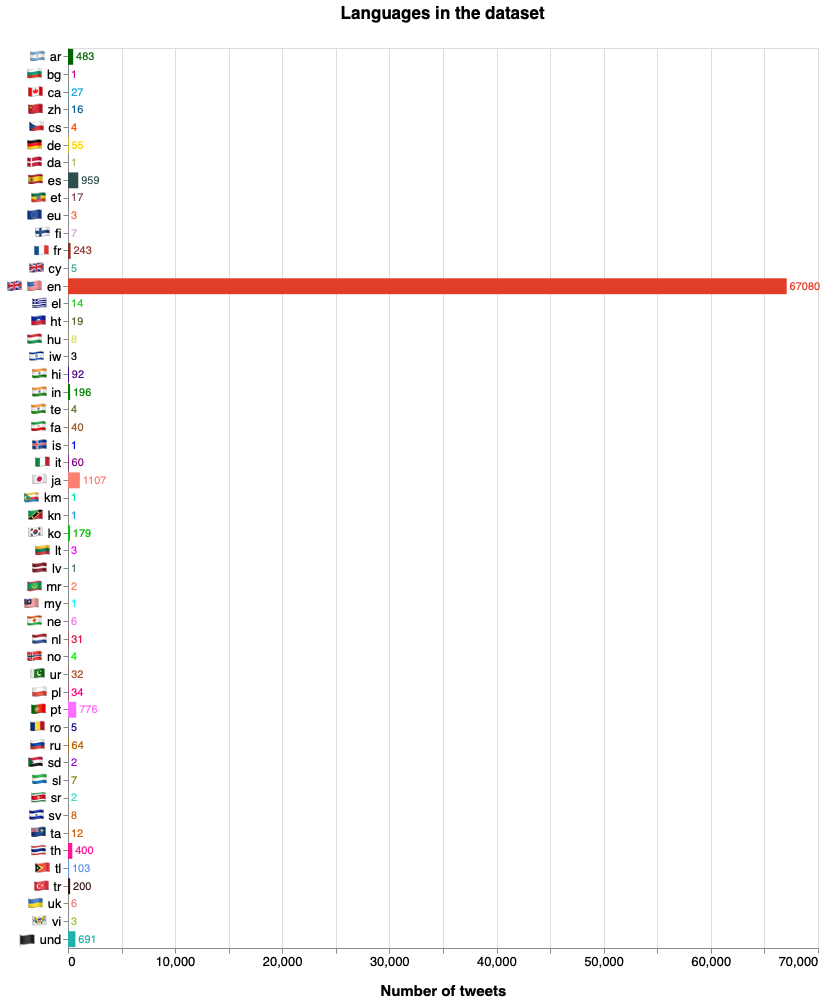

The .json file produced had multiple languages inside the text fields, we wrote this script to translate the fields which weren't in English ("hashtags" and "full_text") to English.

Everything is done through the Google Translate APIs.

Due to Google Translate Limitations to a massive number of requests, the for loop below does a pre-filtering, based on the lang filed from the .json file. The lang field is filled automatically during the hydratation process, the language classification is done by machine learning algorithms.

The script below is the full version, we've dived the execution in two phases: the first one worked on the "full_text" field, the second one worked on the "hashtag" filed considering that the "full_text" filed was already OK.

In [ ]:
import json
import sys
import string
from google_trans_new import google_translator  
import time

data = []
with open('dataset/general_result.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

f.close()


index=0
translator = google_translator()  
for element in data:
    if data[index]['lang']=="en":
        print(str(index)+" già inglese")
    else:
        translated  = translator.translate(data[index]['full_text'],lang_tgt='en')  
        data[index]['full_text'] = translated
        time.sleep(1) #sleep to avoid being blocked by Google 
        #print(str(index)+" indice" + data[index]['full_text'])
        for entity in data[index]['entities']['hashtags']:
            translated = translator.translate(entity['text'],lang_tgt='en')#lang_tgt è l'alt
            entity['text']=translated
            time.sleep(1)  #sleep to avoid being blocked by Google
            #print(str(index)+" indice" + entity['text'])
    index=index+1


with open('general_result_translated_full.json', 'a') as f_w:
    for line_w in data:
        #print("sto stampando")
        json.dump(line_w, f_w)
        f_w.write('\n')

f.close()